# Задание
1. Изучить пример, приведенный ниже.
2. Получить свой датасет у преподавателя.
3. Выбрать числовые признаки и таргет в датасете (признаки делаем числовыми или исключаем их).
2. Проанализировать результаты, полученные с помощью statsmodels.
3. Построить регрессионную зависимость (sklearn [тык](https://scikit-learn.ru/user_guide/)) с помощью метода наименьших квадратов, используя вычисление обратной матрицы. 
4. Построить регрессионную зависимость (sklearn) с помощью метода наименьших квадратов, используя метод градиентного спуска. 
4. Сравнить и описать результаты.

# Регрессионный анализ
[Wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

Немного о pandas

[Документация](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) 

[Шпаргалка](https://smysl.io/blog/pandas/) 

In [2]:
df = pd.read_csv('demo.csv')

In [3]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 9357
Total number of columns in dataset = 17


In [4]:
df.head(10)

Date     Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0  38056.0  0.75000     2.6         1360       150      11.9           1046   
1  38056.0  0.79167     2.0         1292       112       9.4            955   
2  38056.0  0.83333     2.2         1402        88       9.0            939   
3  38056.0  0.87500     2.2         1376        80       9.2            948   
4  38056.0  0.91667     1.6         1272        51       6.5            836   
5  38056.0  0.95833     1.2         1197        38       4.7            750   
6  38057.0  0.00000     1.2         1185        31       3.6            690   
7  38057.0  0.04167     1.0         1136        31       3.3            672   
8  38057.0  0.08333     0.9         1094        24       2.3            609   
9  38057.0  0.12500     0.6         1010        19       1.7            561   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0      166          1056      113          1692         1268  13.6  48.9   
1      103          1174       92          1559          972  13.3  47.7   
2      131          1140      114          1555         1074  11.9  54.0   
3      172          1092      122          1584         1203  11.0  60.0   
4      131          1205      116          1490         1110  11.2  59.6   
5       89          1337       96          1393          949  11.2  59.2   
6       62          1462       77          1333          733  11.3  56.8   
7       62          1453       76          1333          730  10.7  60.0   
8       45          1579       60          1276          620  10.7  59.7   
9     -200          1705     -200          1235          501  10.3  60.2   

       AH  Unnamed: 15  Unnamed: 16  
0  0.7578          NaN          NaN  
1  0.7255          NaN          NaN  
2  0.7502          NaN          NaN  
3  0.7867          NaN          NaN  
4  0.7888          NaN          NaN  
5  0.7848          NaN          NaN  
6  0.7603          NaN          NaN  
7  0.7702          NaN          NaN  
8  0.7648          NaN          NaN  
9  0.7517          NaN          NaN

In [5]:
df.dropna(axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   float64
 1   Time           9357 non-null   float64
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(7), int64(8)
memory usage: 1.1 MB


По df.info() видим, что пустых значений нет. RangeIndex: 200 и Non-Null Count у всех признаков = 200.


In [6]:
target_col = "PT08.S1(CO)"

In [7]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [8]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)


# Линейная регрессия (statsmodels)



In [9]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)

In [10]:
results = model.fit()
results.params

const           -6169.872528
Date                0.178140
Time               48.175103
CO(GT)             -0.009953
NMHC(GT)            0.239155
C6H6(GT)            5.841279
PT08.S2(NMHC)       0.052308
NOx(GT)             0.027154
PT08.S3(NOx)       -0.080801
NO2(GT)            -0.009924
PT08.S4(NO2)        0.154240
PT08.S5(O3)         0.208747
T                  -1.909770
RH                  0.481107
AH                 -0.545081
dtype: float64

In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            PT08.S1(CO)   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     9908.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:23:22   Log-Likelihood:                -37083.
No. Observations:                6549   AIC:                         7.420e+04
Df Residuals:                    6534   BIC:                         7.430e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6169.8725    742.797     -8.306

1. Коэффициенты регрессии модели Y = b0 + b1∙d1 + b2∙d2 + b3∙d3 + const + Date + Time + CO(GT) + NMHC(GT) + C6H6(GT) + PT08.S2(NMHC) + NOx(GT) +  NO2(GT) + PT08.S4(NO2) + PT08.S5(O3) + T + RH + AH



> Intercept = const = -6169.8725

>Date = 0.1781
>Time = 48.1781
>CO(GT) = -0.0100
>NMHC(GT) = 0.2392
>C6H6(GT) = 5.8413
>PT08.S2(NMHC) = 0.0523
>NOx(GT) = 0.0272
>PT08.S3(NOx) = -0.0808
>NO2(GT) = -0.0099
>PT08.S4(NO2) = 0.1542
>PT08.S5(O3) = 0.2087
>T = -1.9098
>RH = 0.4811
>AH = -0.5451

2. Коэффициент детерминации R-squared = 0.955, его скорректированная оценка Adj. R-squared = 0.955 - это означает, что регрессионная модель объясняет 95% вариации переменной Y.


3. Проверка значимости коэффициента детерминации:

>расчетное значение статистики критерия Фишера: F-statistic = 9908

>расчетный уровень значимости Prob (F-statistic) = 0.00

>так как значение Prob (F-statistic) < 0.05, то нулевая гипотеза R-squared = 0 НЕ ПРИНИМАЕТСЯ, т.е. коэффициент детерминации ЗНАЧИМ

4. Проверка значимости коэффициентов регрессии:

>расчетный уровень значимости P>|t| для const, Date, Time, NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S2(NMHC), PT08.S4(NO2), PT08.S5(O3), T, RH не превышает 0.05 - это означает, что коэффициенты регрессии значимы

>об этом же свидетельствует то, что доверительный интервал для коэффициентов регрессии ([0.025; 0.975]) не включает в себя точку 0

>расчетный уровень значимости P>|t| для CO(GT), NO2(GT), AH превышает 0.05. Нулевая гипотеза не отвергается. CO(GT), NO2(GT), AH не являются значимыми.
Нулевая гипотеза - коэффициет равен нулю, альтернативная - не равен.

5. значение t для CO(GT), NO2(GT), AH очень мало (чем выше значение t, тем выше шанс, что мы отвергаем нулевую гипотезу).

Также в таблице результатов содержится прочая информация по коэффициентам регрессии: стандартная ошибка Std.Err. 

# Ваше задание
Удаляем признаки, которые не являются значимыми, и повторяем обучение без них.

In [12]:
# удаление столбцов, в пересечении с которыми в матрице при первом запуское кода значение >0.5 (корреляция с другими данными слишком большая)
df.drop(columns=["C6H6(GT)", "AH", "PT08.S2(NMHC)", "Date", "PT08.S4(NO2)", "RH"], axis="columns", inplace=True)

# тут код для удаления строк с коэфициентом P>|t| > 0.05
df.drop(columns=["CO(GT)", "NO2(GT)"], axis="columns", inplace=True)

df.drop(columns=["Time"], axis="columns", inplace=True)

In [13]:
df.columns

Index(['PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S5(O3)',
       'T'],
      dtype='object')

In [14]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=42)
 
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
# results.params
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            PT08.S1(CO)   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.023e+05
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                        0.00
Time:                        17:23:22   Log-Likelihood:                         -40826.
No. Observations:                6549   AIC:                                  8.166e+04
Df Residuals:                    6544   BIC:                                  8.170e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [15]:
# X_test = sm.add_constant(X_test)

In [16]:
y_pred = results.predict(X_test)

In [17]:
residual = y_test - y_pred

# Предпосылки линейной регрессии
Модель линейной регрессии можно построить не для любых данных, а только для данных, которые удовлетворяют ряду условий. И прежде, чем использовать регрессионное уравнение для прогнозирования, необходимо проверить выполнение этих условий. В ином случае наша модель не будет адекватна поставленной задаче, и ее использование будет бессмысленно.

# Наличие линейной зависимости
Первая и самая естественная предпосылка заключается в линейности модели. Под этим условием подразумевается корректность модели, выбор адекватных предикторов и отсутствие лишних предикторов. А также линейную зависимость целевой переменной от независимых переменных.

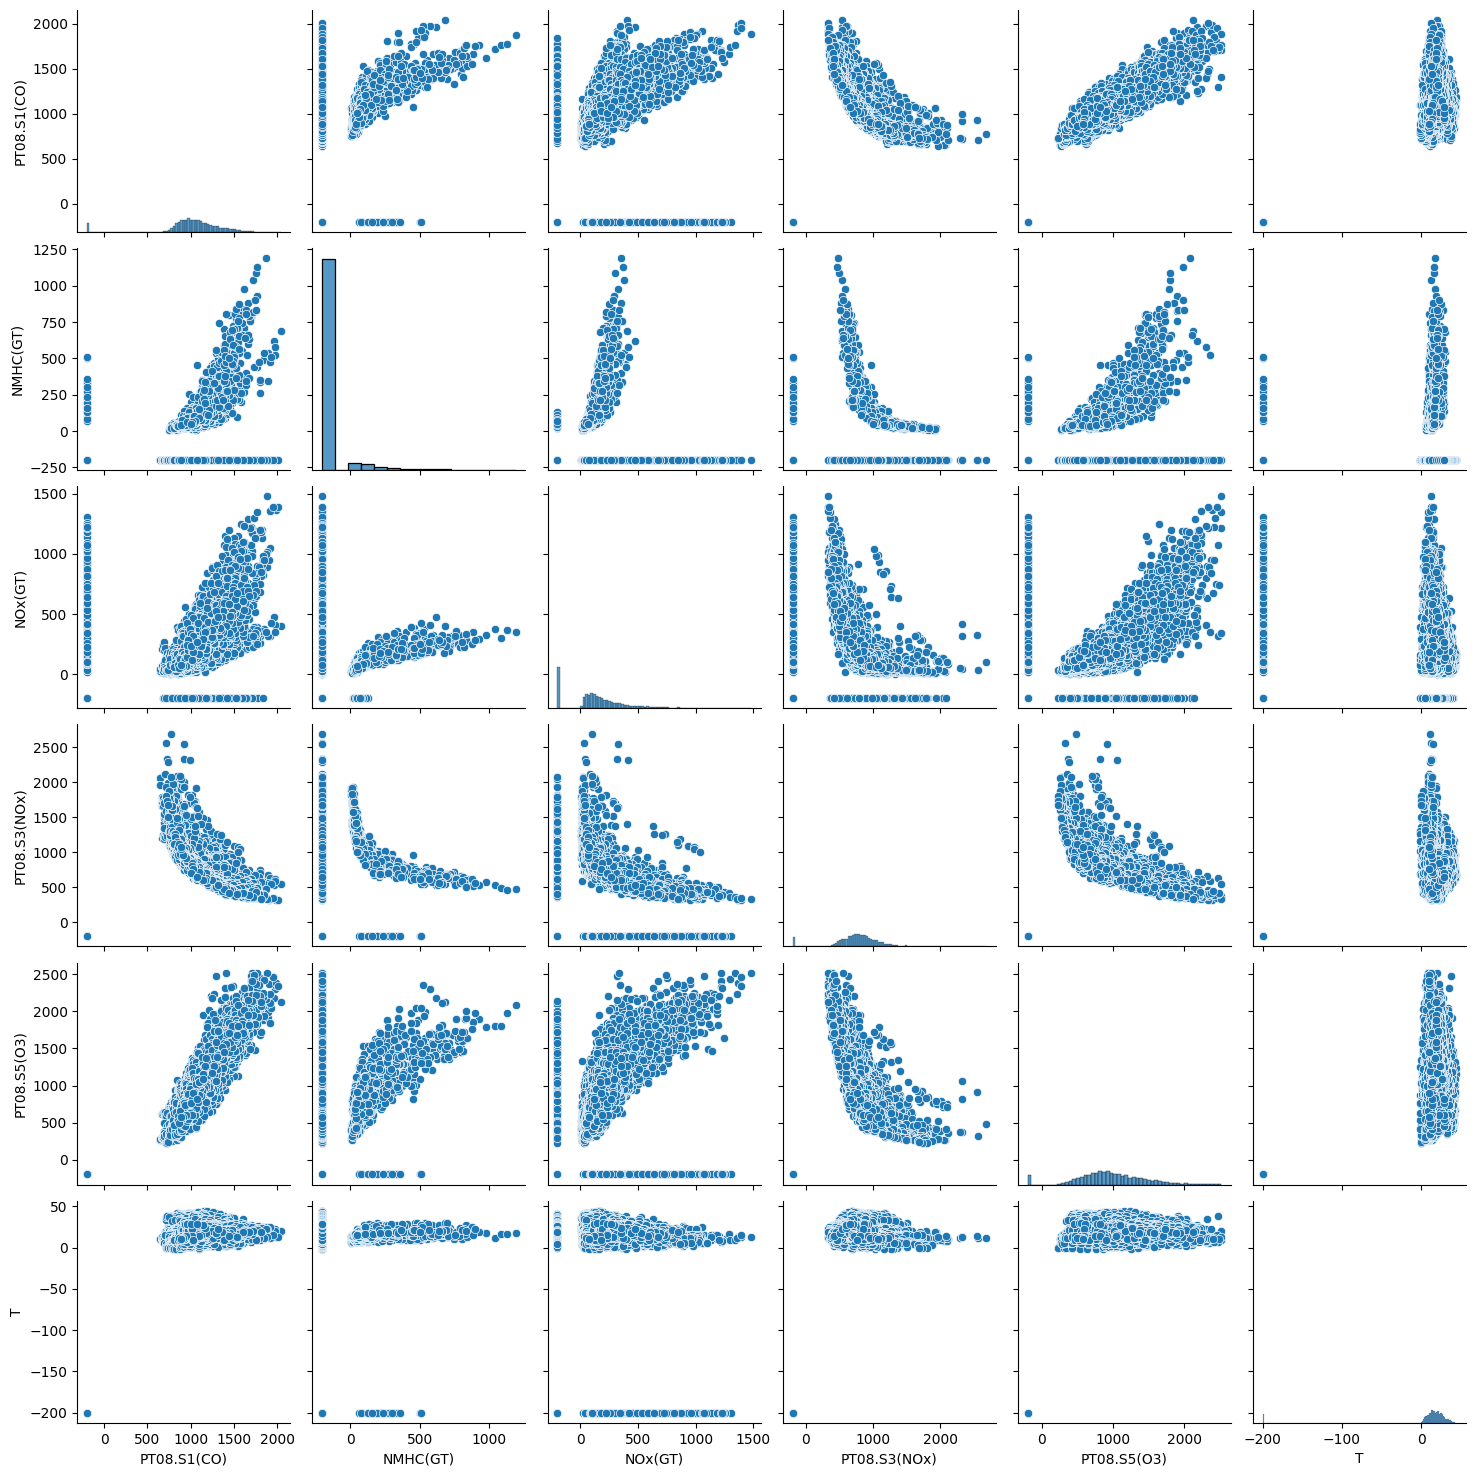

In [18]:
sns.pairplot(df)

# Отсутствие мультиколлинеарности

Мультиколлинеарностью называют явление, которое заключается в наличии линейной зависимости между независимыми переменными (предикторами). Такое может возникать, например, при использовании признаков с естественной взаимосвязью: стаж работы и возраст (как правило, чем больше возраст - тем больше стаж и наоборот), количество детских садов и количество школ в районе (обычно детские сады бывают при школе, так что эти количества пропорционально взаимосвязаны) или баллы за экзамены IELTS и TOEFL (так как они экзамены проверяют примерно одни и те же знания и навыки)

Последствием мультиколлинеарности является расширение доверительных интервалов для коэффициентов, и модель получается очень неустойчивой и меняющейся от добавления даже 1-2 новых наблюдений. Разумеется, это не очень хорошая для нас ситуация, поэтому мы должны отбирать для модели только те предикторы, между которыми нет линейной связи.

Для того чтобы проверить данную предпосылку, нам необходимо построить матрицу корреляций для всех потенциальных предикторов, и отследить наличие сильной корреляционной связи. Нет четкой границы, которая отделяет допустимую взаимосвязь и недопустимую, но в ряде источников используется граница в районе 0.9. То есть, если между предикторами коэффициент корреляции по модулю больше, чем 0.9, то мы не можем оба этих предиктора использовать для модели.

Почитать:

[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C#:~:text=%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20(multicollinearity)%20%E2%80%94%20%D0%B2%20%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B5,%D0%BD%D0%B0%D0%BB%D0%B8%D1%87%D0%B8%D0%B5%20%D1%81%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D1%84%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%B0%D0%BC%D0%B8)

[статья](https://towardsdatascience.com/why-multicollinearity-isnt-an-issue-in-machine-learning-5c9aa2f1a83a)


In [19]:
cols_num = ['NMHC(GT)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S5(O3)', 'T']
correlation = df.corr().loc[cols_num, cols_num]
correlation

NMHC(GT)   NOx(GT)  PT08.S3(NOx)  PT08.S5(O3)         T
NMHC(GT)      1.000000 -0.004427      0.048821     0.101185 -0.000009
NOx(GT)      -0.004427  1.000000     -0.436084     0.461889 -0.138452
PT08.S3(NOx)  0.048821 -0.436084      1.000000    -0.208865  0.588111
PT08.S5(O3)   0.101185  0.461889     -0.208865     1.000000  0.503700
T            -0.000009 -0.138452      0.588111     0.503700  1.000000

<AxesSubplot:>

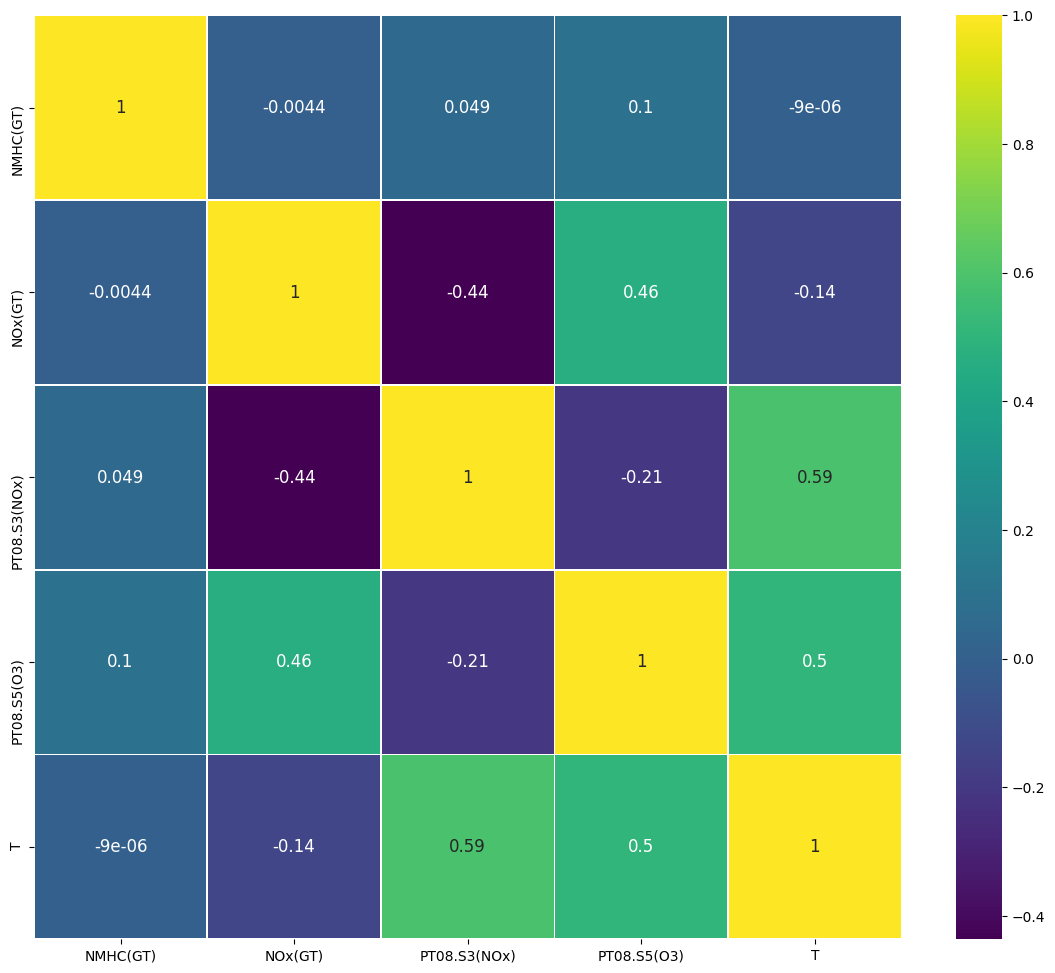

In [20]:

fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})


In [21]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

NMHC(GT)   NOx(GT)  PT08.S3(NOx)  PT08.S5(O3)         T
vif  2.237469  2.323253      3.895157     5.871847  1.457616

# Нормальное распределение ошибок
После того как мы построили модель регрессии, мы можем вычислить ошибки (остатки): разницы между реальным значением $y$ и предсказанным $\hat{y}$. Важным условием является нормальность распределения этих ошибок. То есть, распределение остатков должно стремиться к нормальному распределению. Проверить выполняемость этого условия можно визуально с помощью гистограммы или с помощью специальных статистических тестов.

В целом, такое условие связано не напрямую с остатками, а с тем, что зависимая переменная должна быть распределена нормально для любых значений х. Однако такое условие проверить довольно сложно, поэтому можно проверить такое условие с помощью анализа распределения остатков.

<AxesSubplot:ylabel='Density'>

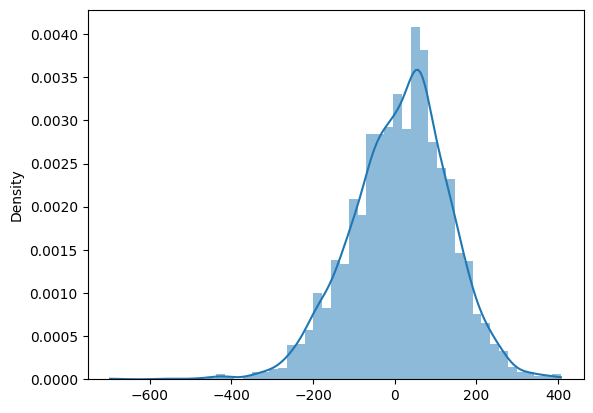

In [22]:
sns.histplot(residual, kde=True, stat="density", linewidth=0)

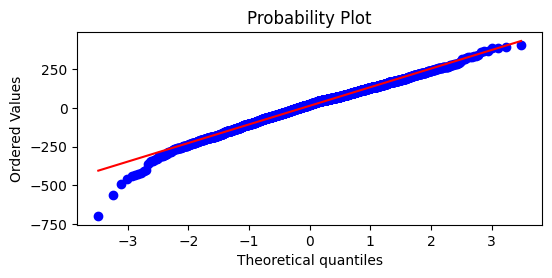

In [23]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [24]:
np.mean(residual)

13.66191417381907

# Гомоскедантичность 
Гомоскедастичность ошибок заключается в том, что разброс остатков при любых значениях независимых переменных одинаковый. Предположим, что мы хотим предсказать стоимость квартиры по каким-то ее признакам. Если для квартир площадью 30-50 метров разброс ошибок будет маленький, а для квартир, площадью 50-70 метров разброс ошибок будет очень большой, то мы будем иметь дело с гетероскедастичностью. Такая ситуация нас не устраивает. Нам важно, чтобы качество модели было одно и то же при любых значениях независимой переменной.

[wiki](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BC%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C)

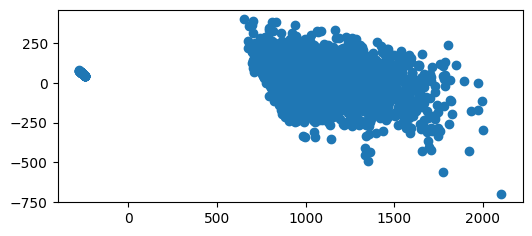

In [25]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

# Отсутствие автокорреляции остатков
Автокорреляция остатков (ошибок) возникает в ситуации, когда есть линейная взаимосвязь между остатками для одних значений предикторов и остатками для других значений предикторов. Такое может проявляться в силу естественных причин, как и в случае сс мультиколлинеарностью. Например, если мы предсказываем какие-то показатели для соседних регионов страны, то, скорее всего, они будут сильно взаимосвязаны просто в силу схожести характеристик этих объектов.

Автокорреляция влечет за собой некорректные результаты. Стандартные ошибки получаются несостоятельными, и мы не можем строить корректные доверительные интервалы и проверять гипотезы классическими способами.

[wiki](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F)

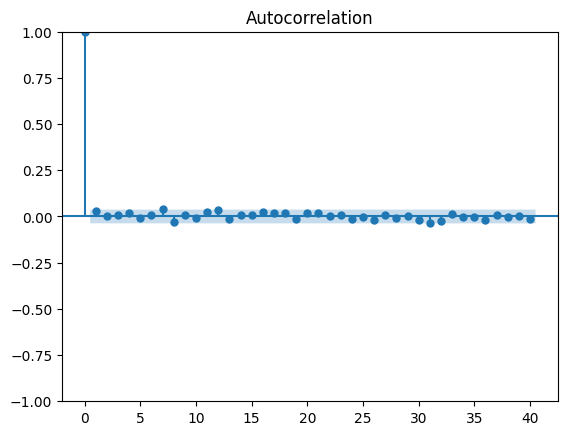

In [26]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)


## Матрицами ([статья](https://habr.com/en/post/479398/))

## $\beta^* = (X^T \cdot X)^{-1}\cdot X^T \cdot Y$



In [27]:
# тут будет код
# X_test = X_test.drop("const", axis=1)
# тут будет код
def find_theta(X, y):

  X_b = np.concatenate([np.ones((len(X), 1)), X], axis=1)

  theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

  # intercept, *coef = theta_best
  # print(f"Coef const: {intercept}\nCoefs: {coef}")
  return theta_best

theta_best = find_theta(X_train, y_train.to_numpy())
theta_best

array([ 0.00234191, -0.02445004,  0.38288968,  0.75475904,  0.10321865])

## Градиентным спуском  ([статья](https://habr.com/en/post/474602/))

Инициализируем случайную точку (часто берут просто нули):

$$
\beta_0 = (0\;\; 0 ...)
$$

Итеративно скачем по линиям уровня нашей функции, шагая каждый раз в сторону антиградиента с корректировкой шага $\eta_k$:

$$
\beta_{k+1} = \beta_k - \eta_{k}\cdot\nabla Q(\beta_k, X)
$$
 
Останавливаемся, когда срабатывает критерий останова. Например:

$$
|\beta_{k+1} - \beta_k| < \xi
$$

Пусть имеем 3 объекта $(X, Y)^i$ = $\left((d_i, 1), Y_i \right)$ с 3 признаками $d_1$, $d_2$ (+ константа). Хотим оценить обычную линейную модель:

$$
a(x) = \beta_1 \cdot d_1 + \beta_2 \cdot d_2 + \beta_0
$$

Тогда функционал ошибки как среднеквадратическая ошибка на нашей выборке выглядит следующим образом:

$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)^2
$$

Посчитаем вектор-градиент по всем оцениваемым параметрам:

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; Q'_{\beta_0})
$$

Пример расчета производной по параметру у признака номер 1:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} \cdot (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)
$$

In [28]:
np.set_printoptions(suppress=True)

N = X_train.shape[0]
ROWS_COUNT = X_train.shape[1]
params = np.zeros(ROWS_COUNT)
X2 = X_train.to_numpy()
y2 = y_train.to_numpy()

lr = 3.5 * 10e-5
eps = 0.0000000001
errors = [1, 0]
grad = np.zeros(ROWS_COUNT)

while abs(errors[-1] - errors[-2]) > eps:
  predictions = (params @ X2.T).T

  error = (1/N) * sum((predictions - y2) ** 2)
  errors.append(error)

  for feat in range(ROWS_COUNT):
    grad[feat] = 2/N * sum(X2[:, feat] * (predictions - y2))
    params[feat] -= lr * grad[feat]

print(params)

[-5.65330873e+156  6.82476666e+156  2.91881974e+157  3.88027982e+157
  6.92207959e+155]


C:\Users\mdpan\AppData\Local\Temp\ipykernel_17976\1482969922.py:17: RuntimeWarning: overflow encountered in square
  error = (1/N) * sum((predictions - y2) ** 2)
C:\Users\mdpan\AppData\Local\Temp\ipykernel_17976\1482969922.py:14: RuntimeWarning: invalid value encountered in double_scalars
  while abs(errors[-1] - errors[-2]) > eps:


# Тут будет описание

Значения коэфициента по таблице: [0.0023, -0.0245, 0.3829, 0.7548, 0.1032]

Матрица: [0.00234191, -0.02445004,  0.38288968, 0.75475904, 0.10321865]

Градиентный спуск: [-5.65330873e+156, 6.82476666e+156, 2.91881974e+157, 3.88027982e+157, 6.92207959e+155]

# По материалам
1. https://github.com/bhattbhavesh91/linear-regression-assumptions
2. https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b
3. https://habr.com/en/post/690414/
4. Еще каких-то хороших людей